In [2]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [3]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="darkgrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [10, 5]})

In [5]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.rcParams['figure.figsize']=(14,5)
import seaborn as sns
import seaborn as sb
sb.set()
plt.style.use('dark_background')
%matplotlib inline

In [6]:
ticker = ['MSFT']
start = datetime.datetime(2021,9, 19)
end = datetime.datetime(2023, 9, 19)
df = yf.download(ticker, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [7]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-20,296.329987,298.720001,289.519989,294.299988,289.063141,38278700
2021-09-21,295.690002,297.540009,294.070007,294.799988,289.554260,22364100
2021-09-22,296.730011,300.220001,294.510010,298.579987,293.266937,26626300
2021-09-23,298.850006,300.899994,297.529999,299.559998,294.229523,18604600
2021-09-24,298.230011,299.799988,296.929993,299.350006,294.023254,14999000
...,...,...,...,...,...,...
2023-09-12,335.820007,336.790009,331.480011,331.769989,331.769989,17565500
2023-09-13,331.309998,336.850006,331.170013,336.059998,336.059998,16544400
2023-09-14,339.149994,340.859985,336.570007,338.700012,338.700012,20267000


In [8]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh
cf.go_offline()
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [9]:
df['Close'].iplot()

In [10]:
fig_price=px.line(df['Close'], title='Price of MSFT')
fig_price.show()

In [11]:
#We create a function to calculate the Simple Moving Average (SMA)

def SMA(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

In [12]:
df['SMA']=SMA(df,21)
df['Simple_Returns']=df.pct_change(1)['Close']
df['Log_Returns']=np.log(1+df['Simple_Returns'])
df['Ratios']=df['Close']/df['SMA']

In [13]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA,Simple_Returns,Log_Returns,Ratios
Date,,,,,,,,,,
2021-09-20,296.329987,298.720001,289.519989,294.299988,289.063141,38278700,NaN,NaN,NaN,NaN
2021-09-21,295.690002,297.540009,294.070007,294.799988,289.554260,22364100,NaN,0.001699,0.001698,NaN
2021-09-22,296.730011,300.220001,294.510010,298.579987,293.266937,26626300,NaN,0.012822,0.012741,NaN
2021-09-23,298.850006,300.899994,297.529999,299.559998,294.229523,18604600,NaN,0.003282,0.003277,NaN
2021-09-24,298.230011,299.799988,296.929993,299.350006,294.023254,14999000,NaN,-0.000701,-0.000701,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-09-12,335.820007,336.790009,331.480011,331.769989,331.769989,17565500,326.266192,-0.018258,-0.018426,1.016869
2023-09-13,331.309998,336.850006,331.170013,336.059998,336.059998,16544400,326.838572,0.012931,0.012848,1.028214
2023-09-14,339.149994,340.859985,336.570007,338.700012,338.700012,20267000,327.640478,0.007856,0.007825,1.033755


In [14]:
df['Ratios'].describe()

count    482.000000
mean       1.002887
std        0.042634
min        0.909607
25%        0.970206
50%        1.003782
75%        1.036980
max        1.106145
Name: Ratios, dtype: float64

In [15]:
#We set and show the percentile values

percentiles=[15,20,50,80,85]

In [16]:
#We remove NAN values en the Ratios Column

ratios=df['Ratios'].dropna()

In [17]:
#We get the values of the percentiles

percentile_values=np.percentile(ratios, percentiles)

In [18]:
#We show the values of the percentiles

percentile_values

array([0.95320224, 0.9616756 , 1.00378168, 1.0426474 , 1.05073594])

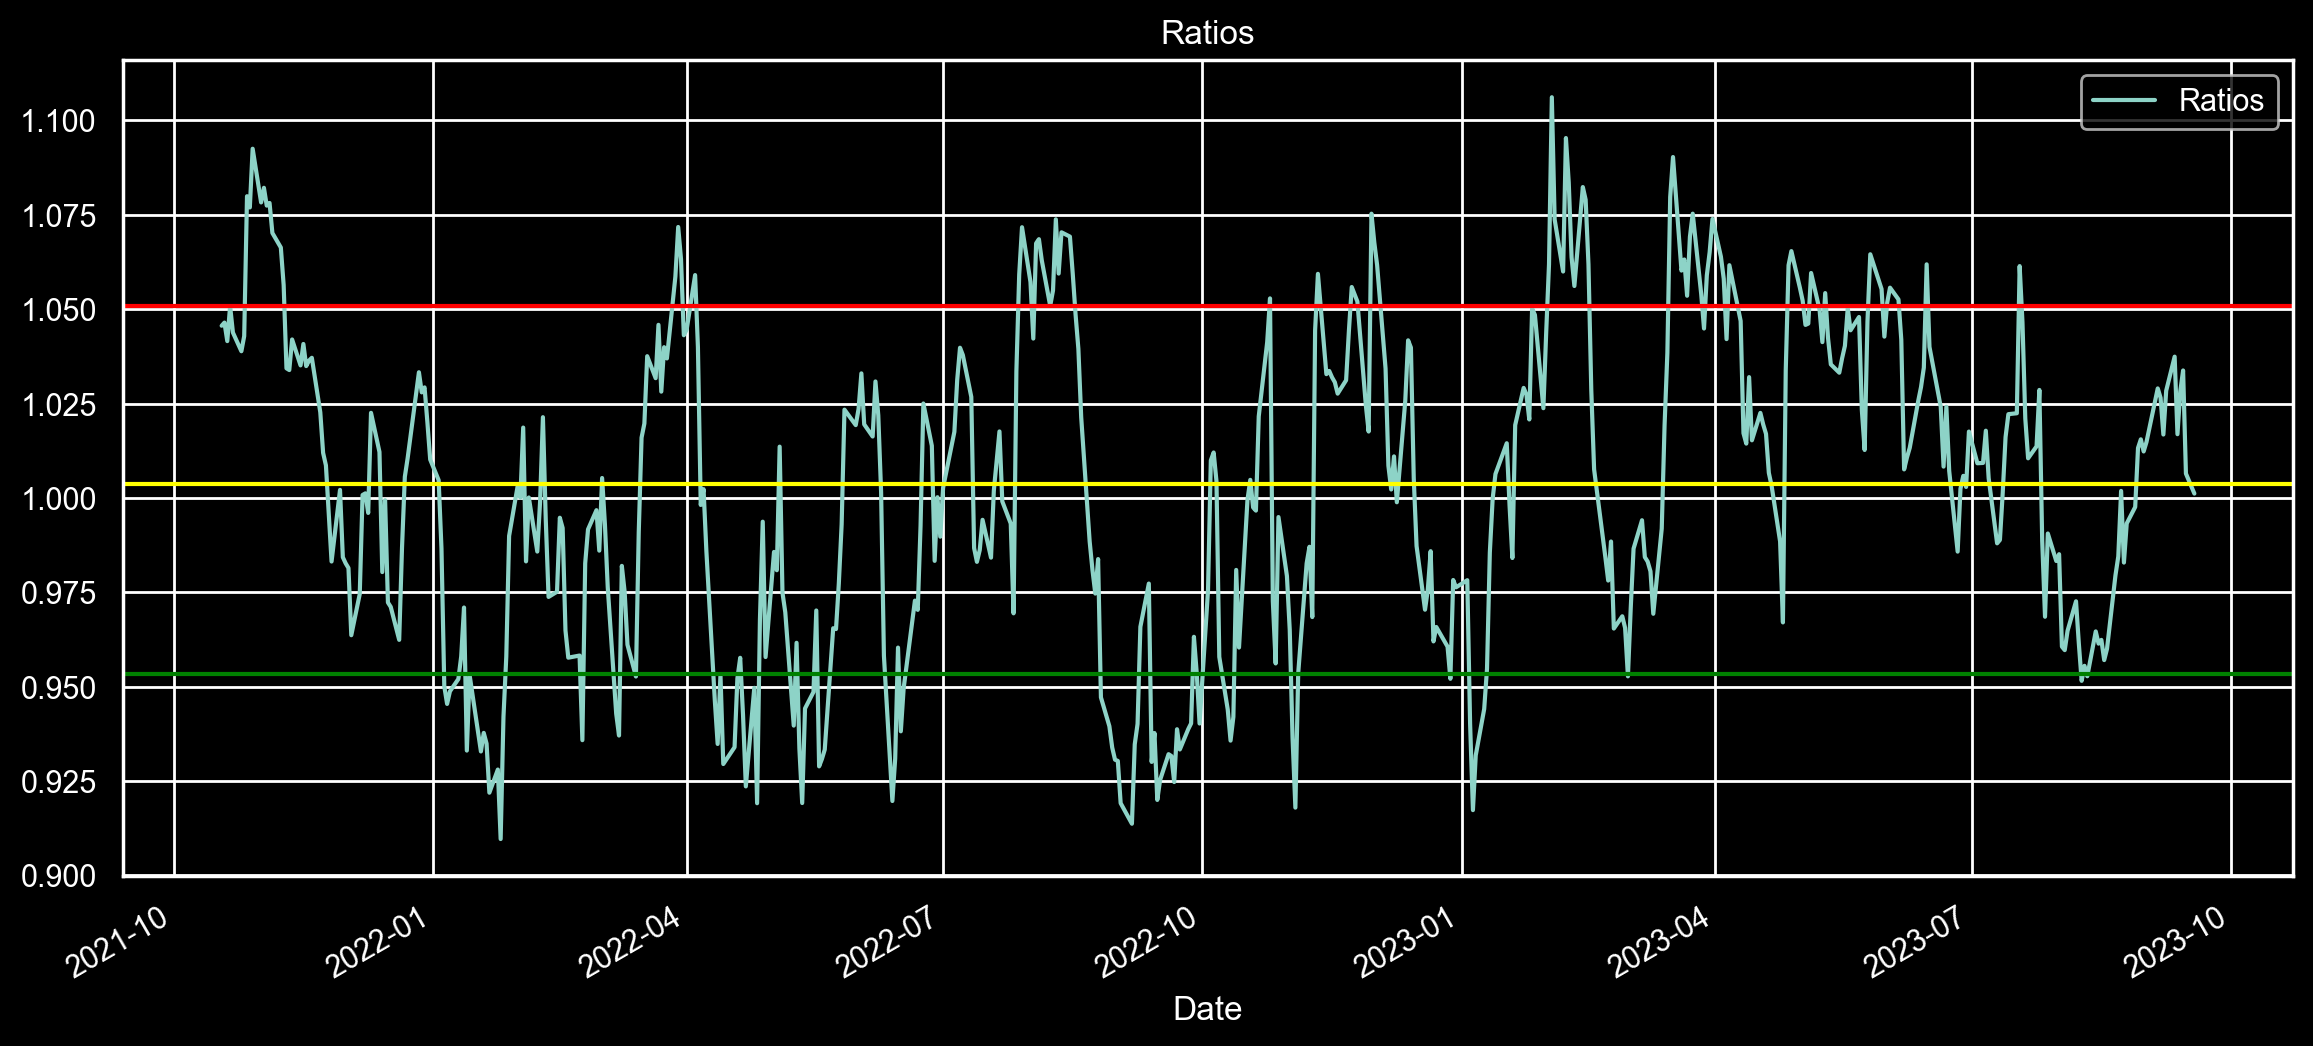

In [19]:
#We plot the ratios

plt.figure(figsize=(14,6))
plt.title('Ratios')
df['Ratios'].dropna().plot(legend=True)
plt.axhline(percentile_values[0], c='green', label='15th percentile')
plt.axhline(percentile_values[2], c='yellow', label='50th percentile')
plt.axhline(percentile_values[-1], c='red', label='85th percentile')

In [20]:
#We create buy and sell signals for the strategy

sell=percentile_values[-1]    #The 85th percentile threshold where we want to sell
buy=percentile_values[0]      #The 15th percentile threshold whre we want to buy.


In [21]:
#we put a -1 where the ratio is greater than the percentile to sell and NAN otherwise

df['Positions']=np.where(df.Ratios > sell, -1, np.nan)

In [22]:
#we put a 1 where the ratio is less than the percentile to buy and put the current value otherwise

df['Positions']=np.where(df.Ratios < buy, 1, df['Positions'])

In [23]:
#We use ffill to fill the missing values in the dataframe. ffill stands for forward fill

df['Positions']=df['Positions'].ffill()

In [24]:
#we get the buy and sell signals

df['Buy']=np.where(df.Positions==1, df['Close'], np.nan)
df['Sell']=np.where(df.Positions==-1, df['Close'], np.nan)

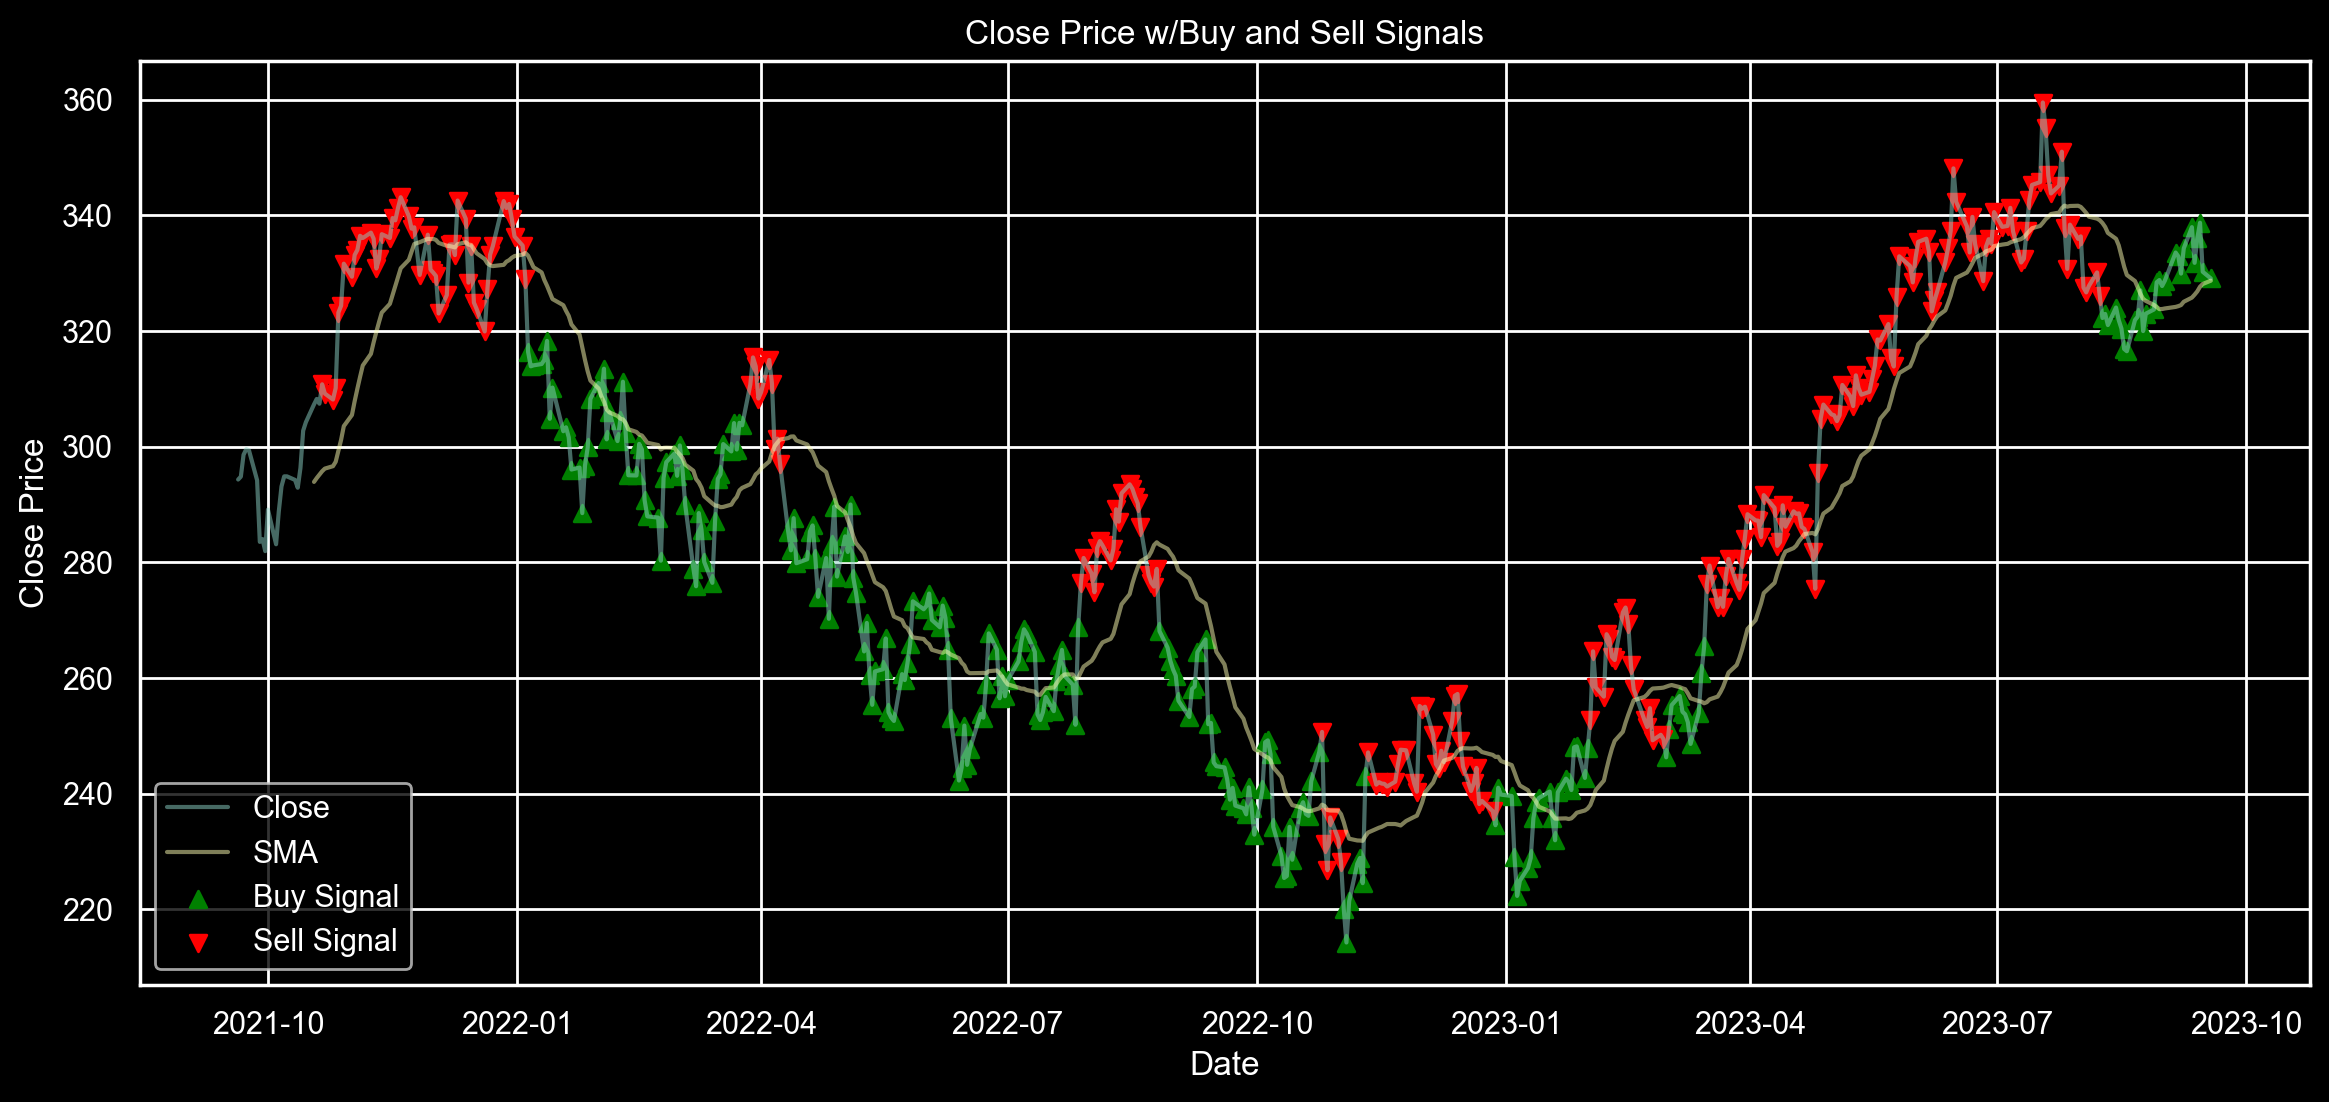

In [25]:
#We visualize the buy and sell signlas along with the close price

plt.figure(figsize=(14,6))
plt.title('Close Price w/Buy and Sell Signals')
plt.plot(df['Close'], alpha=0.5, label='Close')
plt.plot(df['SMA'], alpha=0.5, label='SMA')
plt.scatter(df.index,df['Buy'], color='green', label='Buy Signal', marker='^', alpha=1)
plt.scatter(df.index,df['Sell'], color='red', label='Sell Signal', marker='v', alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [26]:
#We calculate the returns for the Mean Reversion Strategy

df['Strategy_Returns']=df.Positions.shift(1)*df.Log_Returns

In [27]:
df['Strategy_Returns']

Date
2021-09-20         NaN
2021-09-21         NaN
2021-09-22         NaN
2021-09-23         NaN
2021-09-24         NaN
                ...   
2023-09-12   -0.018426
2023-09-13    0.012848
2023-09-14    0.007825
2023-09-15   -0.025356
2023-09-18   -0.003519
Name: Strategy_Returns, Length: 502, dtype: float64

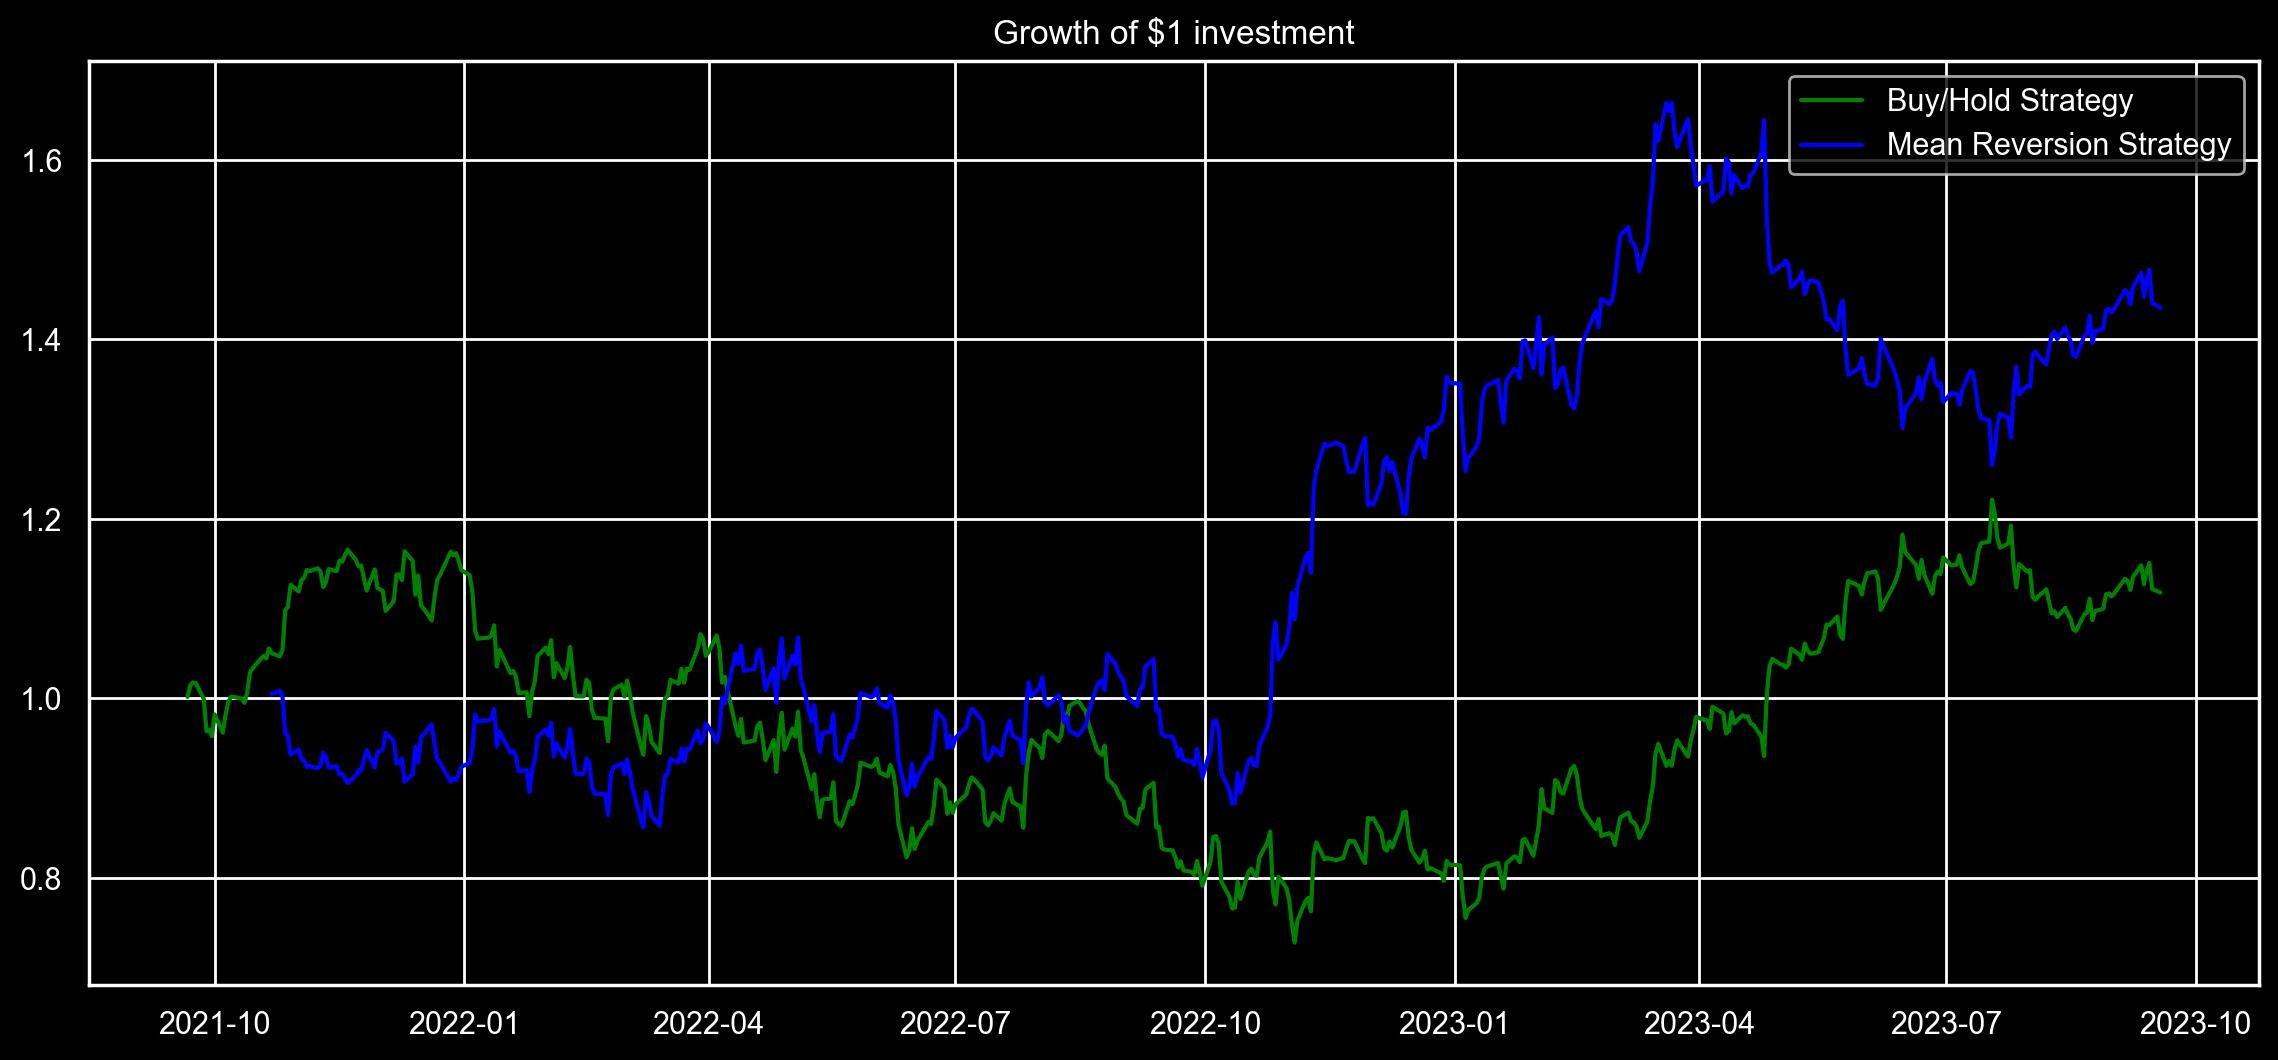

In [28]:
#We plot the cumulative log returns and the cumulative Mean Reversion Strategy

plt.figure(figsize=(14,6))
plt.title('Growth of $1 investment')
plt.plot(np.exp(df['Log_Returns'].dropna()).cumprod(), c='green', label='Buy/Hold Strategy')
plt.plot(np.exp(df['Strategy_Returns'].dropna()).cumprod(), c='blue', label='Mean Reversion Strategy')
plt.legend()

In [29]:
#We print returns for both strategies

print('Buy and Hold Strategy Returns: ', np.exp(df['Log_Returns'].dropna()).cumprod()[-1]-1)
print('Mean Reversion Strategy Returns: ', np.exp(df['Strategy_Returns'].dropna()).cumprod()[-1]-1)

Buy and Hold Strategy Returns:  0.11811080940335339
Mean Reversion Strategy Returns:  0.4355480487987151
